# Plot Individual Traces
**Description:** This notebook visualizes the signals for a single embryo.  

* Dff trace
* Partial dff trace
* Spectrogram

## Import Libraries

In [69]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd

from pasna_analysis import Experiment, ExperimentConfig, Group
from alanafunctions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

Specify the location of the data by editing `folder` and `experiment_name`. Then specify the embryo.

In [52]:
folder = '25C' # HERE
experiment_name = '20240919_25C' # HERE

to_exclude = [5,6,9,10,11,16]

exp_path = Path.cwd().parent.joinpath('data', folder, experiment_name)
exp = Experiment(exp_path, first_peak_threshold=0, 
        to_exclude=to_exclude, dff_strategy='local_minima', hatches=True)

embryos = list(exp.embryos.values())
emb = embryos[14] # HERE

print(f'Loading {folder} {experiment_name} {emb.name}')

Loading 25C 20240919_25C emb21


## Configure Plot Style

Customize the Matplotlib plots with rcParams. For a full list of parameters see [matplotlib.rcParams](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#default-values-and-styling)

In [57]:
trace_rc = {
    'figure.figsize': (35, 5),
    'figure.frameon': False,

    'lines.linewidth': 3,

    'font.family': 'Arial',
    'font.size': 40,

    'xtick.major.size': 10, # length
    'xtick.major.width': 2,
    'ytick.major.size': 10, # length
    'ytick.major.width': 2,

    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelpad': 10,
    'axes.linewidth': 2.5
}

partial_trace_rc = {
    'figure.figsize': (20, 8),
    'figure.frameon': False,

    'lines.linewidth': 4,

    'font.family': 'Arial',
    'font.size': 40,

    'xtick.major.size': 10, # length
    'xtick.major.width': 2,
    'ytick.major.size': 10, # length
    'ytick.major.width': 2,

    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelpad': 10,
    'axes.linewidth': 2.5
}

spec_rc = {
    'figure.figsize': (35, 8),
    'figure.frameon': False,

    'font.family': 'Arial',
    'font.size': 40,

    'axes.spines.top': False,
    'axes.spines.right': False,

    'xtick.major.size': 10, # length
    'xtick.major.width': 2,
    'ytick.major.size': 10, # length
    'ytick.major.width': 2,
    'axes.labelpad': 10,
    'axes.linewidth': 2.5
}

mymap = mpl.colormaps['turbo']
mymap.set_over('black')

## Plot DFF

Preprocesses the dff to a standardized length, then plots it over real time.

**preprocess_dff**

optional parameters:
* duration: target number of frames to include
* onset_pad: number of frames to include before onset


**plot_trace** 

optional parameters:
* color: line color
* xmin: x-axis minimum in minutes
* xmax: x-axis maximum in minutes
* xinterval: num of minutes between ticks
* ymin: y-axis minimum in minutes
* ymax: y-axis maximum in minutes

True


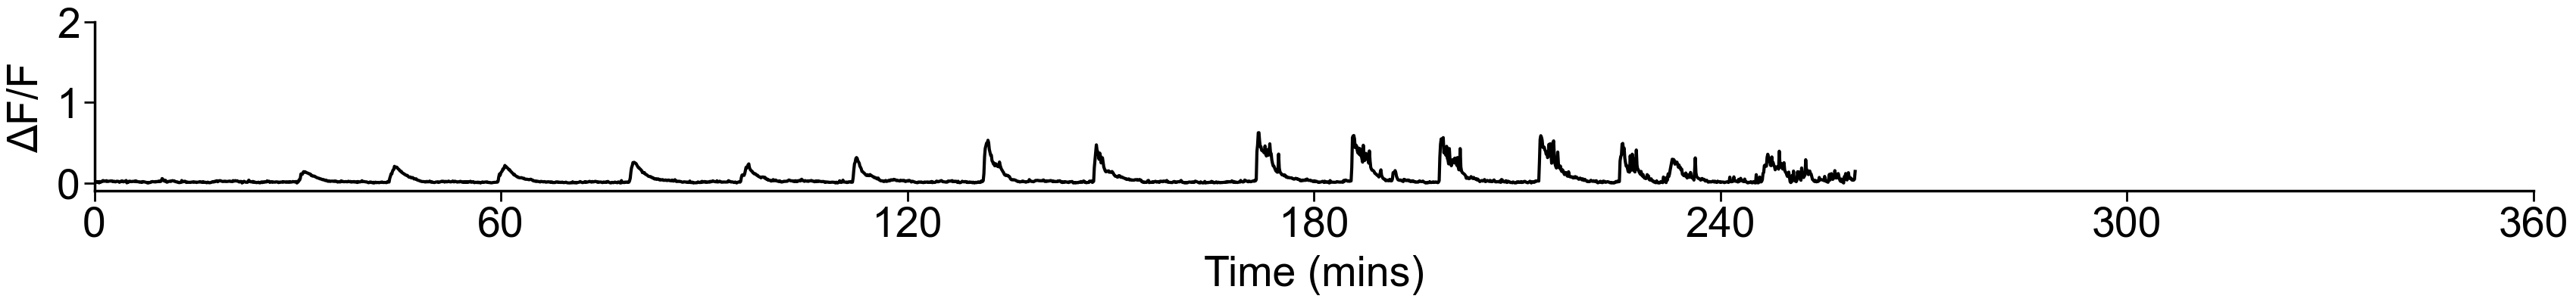

In [62]:
_, time, dff = preprocess_dff(emb)
plot_trace(time, dff, trace_rc, ymax=2)

## Plot Partial DFF

Preprocesses the dff to a standardized length, then plots it over real time.

**preprocess_dff** 

optional parameters:
* duration: target number of frames to include
* onset_pad: number of frames to include before onset


**plot_trace** 

optional parameters:
* color: line color
* xmin: x-axis minimum in minutes
* xmax: x-axis maximum in minutes
* xinterval: num of minutes between ticks
* ymin: y-axis minimum in minutes
* ymax: y-axis maximum in minutes

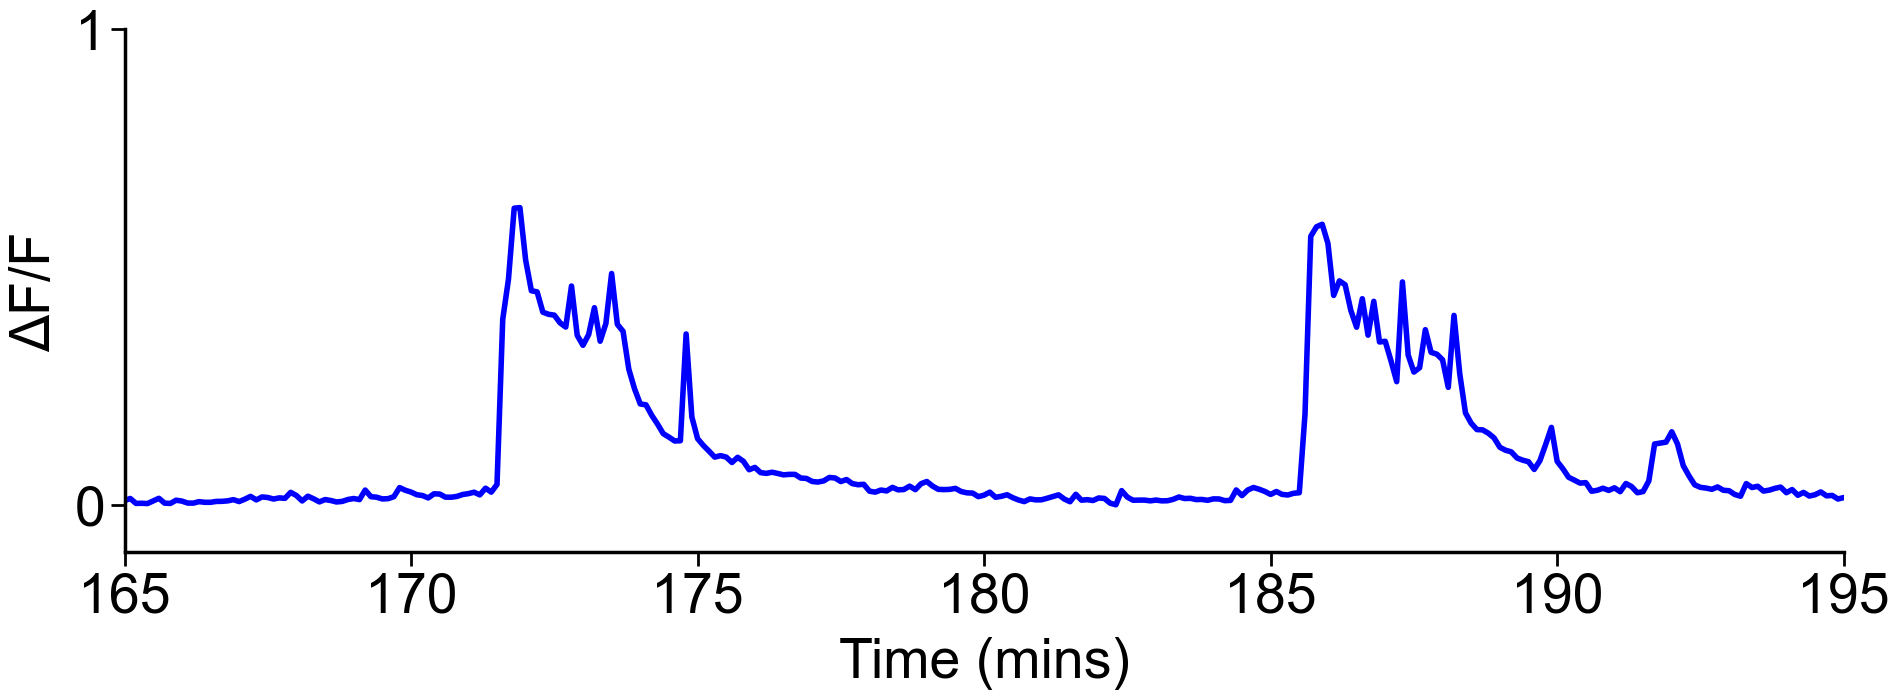

In [ ]:
_, time, dff = preprocess_dff(emb)
plot_trace(time, dff, partial_trace_rc, xmin=165, xmax=195, xinterval=5, ymax=1)

## Plot Spectrogram

Preprocesses the dff to a standardized length, then plots the magnitude of its STFT over time. The x-axis displays time (columns), y-axis displays frequency (rows), and color displays intensity. 

**preprocess_dff** 

optional parameters:
* duration: target number of frames to include
* onset_pad: number of frames to include before onset


**calculate_STFT**

optional parameters:
* fs: sampling rate
* fft_size: num frames in each segment
* noverlap: num frames to overlap between segements

**plot_spec** 

optional parameters:
* display_colorbar: True to display, False to hide
* xmin: x-axis minimum in minutes
* xmax: x-axis maximum in minutes
* ymin: y-axis minimum in minutes
* ymax: y-axis maximum in minutes

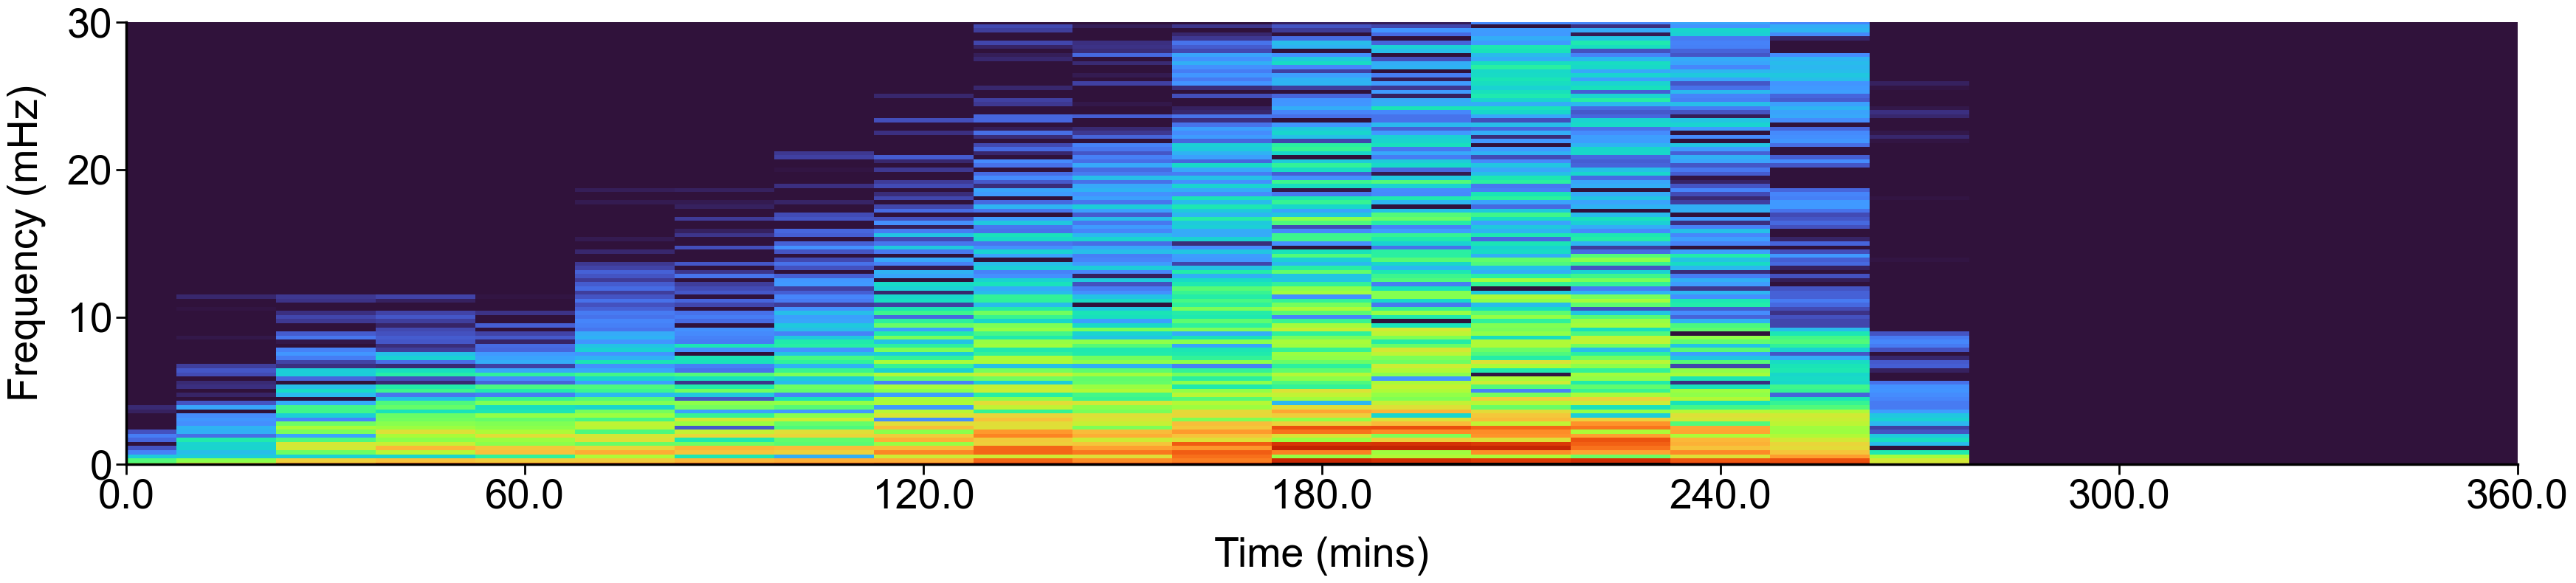

In [72]:
_, time, dff = preprocess_dff(emb)
f, t, mag = calculate_STFT(dff)
plot_spec(f, t, mag, mymap, spec_rc, display_colorbar=False)